# Mounting data (for Databricks ONLY!)

In [ ]:
#Mounting the data for further use.
dbutils.fs.mount(
    source = "wasbs://public@bigdatateaching.blob.core.windows.net/project-data/",
    mount_point = "/mnt/project-data/",
    extra_configs = {"fs.azure.account.key.bigdatateaching.blob.core.windows.net": "o5z1o5By3dDrLNdiTXglUg6LpjmlhLCxMqNb2/dPBXHvSOiH3R0q2+fACMPxSLmCd0V+sXsFm7jl0UraFR3GUA=="})

Out[1]: True

# AWS Version

## Intializing a Spark Session

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("project").getOrCreate()

In [2]:
spark

### Reading the search_click table
#### using 'tab' as a delimiter since they are tab seperated values.

In [3]:
#Reading the search_click table
#using 'tab' as a delimiter since they are tab seperated values.
search_click = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option("delimiter", "\t").load('s3://bigdatateaching/project-data/search_click.txt')

##### Checking the Schema of the search_click table.

In [4]:
search_click.printSchema()

root
 |-- SearchID: integer (nullable = true)
 |-- AdID: integer (nullable = true)
 |-- Position: integer (nullable = true)
 |-- ObjectType: integer (nullable = true)
 |-- HistCTR: double (nullable = true)
 |-- IsClick: integer (nullable = true)



### Reading the combined_stream table
#### using 'tab' as a delimiter since they are tab seperated values.

In [5]:
combined_stream = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option("delimiter", "\t").load('s3://bigdatateaching/project-data/combined_stream.txt')

##### Checking the Schema of the combined_stream table.

In [6]:
combined_stream.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- IPID: integer (nullable = true)
 |-- AdID: integer (nullable = true)
 |-- ViewDate: timestamp (nullable = true)
 |-- Source: string (nullable = true)



### Reading the search_info table
#### using 'tab' as a delimiter since they are tab seperated values.

In [7]:
search_info = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option("delimiter", "\t").load('s3://bigdatateaching/project-data/search_info.txt')

##### Checking the Schema of the serach_info table.

In [8]:
search_info.printSchema()

root
 |-- SearchID: integer (nullable = true)
 |-- SearchDate: timestamp (nullable = true)
 |-- IPID: integer (nullable = true)
 |-- UserID: integer (nullable = true)
 |-- IsUserLoggedOn: integer (nullable = true)
 |-- SearchQuery: string (nullable = true)
 |-- LocationID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- SearchParams: string (nullable = true)



#### Reading the ad_info table
##### using 'tab' as a delimiter since they are tab seperated values.

In [9]:
ad_info = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option("delimiter", "\t").load('s3://bigdatateaching/project-data/ad_info.txt')

##### Checking the Schema of the ad_info table.

In [10]:
ad_info.printSchema()

root
 |-- AdID: integer (nullable = true)
 |-- LocationID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- Params: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Title: string (nullable = true)
 |-- IsContext: integer (nullable = true)



### Reading the user_info table
##### using 'tab' as a delimiter since they are tab seperated values.

In [11]:
user_info = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option("delimiter", "\t").load('s3://bigdatateaching/project-data/user_info.txt')

##### Checking the Schema of the user_info table.

In [12]:
user_info.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- UserAgentID: integer (nullable = true)
 |-- UserAgentOSID: integer (nullable = true)
 |-- UserDeviceID: integer (nullable = true)
 |-- UserAgentFamilyID: integer (nullable = true)



### Reading the location table
#### using 'tab' as a delimiter since they are tab seperated values.

In [13]:
location = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option("delimiter", "\t").load('s3://bigdatateaching/project-data/location.txt')

##### Checking the Schema of the location table.

In [14]:
location.printSchema()

root
 |-- LocationID: integer (nullable = true)
 |-- Level: integer (nullable = true)
 |-- RegionID: integer (nullable = true)
 |-- CityID: integer (nullable = true)



### Reading the category table
#### using 'tab' as a delimiter since they are tab seperated values.

In [15]:
category = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option("delimiter", "\t").load('s3://bigdatateaching/project-data/category.txt')

##### Checking the Schema of the category table.

In [16]:
category.printSchema()

root
 |-- CategoryID: integer (nullable = true)
 |-- Level: integer (nullable = true)
 |-- ParentCategoryID: integer (nullable = true)
 |-- SubcategoryID: integer (nullable = true)



### Reading Libraries for Manipulation and Visualisation

In [17]:
import seaborn as se
import matplotlib.pyplot as plt
import pandas as pd

## Printing 1 row of all the Tables

In [19]:
search_info.show(1)
combined_stream.show(1)
search_click.show(1)

+--------+-------------------+-------+-------+--------------+-----------+----------+----------+------------+
|SearchID|         SearchDate|   IPID| UserID|IsUserLoggedOn|SearchQuery|LocationID|CategoryID|SearchParams|
+--------+-------------------+-------+-------+--------------+-----------+----------+----------+------------+
|       1|2015-05-18 19:54:32|1717090|3640266|             0|       null|      1729|         5|        null|
+--------+-------------------+-------+-------+--------------+-----------+----------+----------+------------+
only showing top 1 row

+------+-------+------+-------------------+------+
|UserID|   IPID|  AdID|           ViewDate|Source|
+------+-------+------+-------------------+------+
| 59703|1259356|469877|2015-04-25 00:00:00| visit|
+------+-------+------+-------------------+------+
only showing top 1 row

+--------+--------+--------+----------+--------+-------+
|SearchID|    AdID|Position|ObjectType| HistCTR|IsClick|
+--------+--------+--------+----------

In [20]:
ad_info.show(1)
user_info.show(1)
location.show(1)
category.show(1)

+----+----------+----------+--------------------+--------+-------------------+---------+
|AdID|LocationID|CategoryID|              Params|   Price|              Title|IsContext|
+----+----------+----------+--------------------+--------+-------------------+---------+
|   1|       343|        43|{1283:'С пробегом...|160000.0|Toyota Estima, 1993|        0|
+----+----------+----------+--------------------+--------+-------------------+---------+
only showing top 1 row

+------+-----------+-------------+------------+-----------------+
|UserID|UserAgentID|UserAgentOSID|UserDeviceID|UserAgentFamilyID|
+------+-----------+-------------+------------+-----------------+
|     1|      44073|           30|        2019|                9|
+------+-----------+-------------+------------+-----------------+
only showing top 1 row

+----------+-----+--------+------+
|LocationID|Level|RegionID|CityID|
+----------+-----+--------+------+
|         7|    3|      83|  2386|
+----------+-----+--------+------+
on

## Grouping by Object Type

In [37]:
search_data = search_click.groupBy("ObjectType").sum("SearchID")

#### Converting into Pandas for Visualisation

In [38]:
search_a = search_data.toPandas()

/home/hadoop/miniconda/lib/python3.7/site-packages/pyarrow/util.py:43: FutureWarning: pyarrow.open_stream is deprecated as of 0.17.0, please use pyarrow.ipc.open_stream instead.
  warnings.warn(msg, FutureWarning)


## Performing Analysis

In [41]:
search_a.rename(columns = {'sum(SearchID)':'Number of Objects'}, inplace = True)
search_a = search_a.replace({'ObjectType' : { 1 : 'Regular free ads', 2 : 'Highlighted regular', 3 : 'Contextual ads'}})
search_a

,ObjectType,Number of Objects
0,Regular free ads,9268977369020128
1,Contextual ads,10836230822629195
2,Highlighted regular,2252572006636709


## Piechart Visualisation

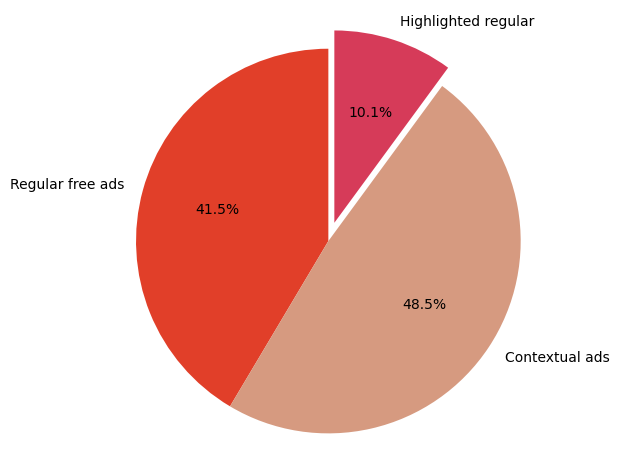

In [42]:
colors = ["#E13F29", "#D69A80", "#D63B59"]

# Create a pie chart
plt.pie(search_a['Number of Objects'],labels=search_a['ObjectType'],shadow=False,colors=colors,explode=(0, 0, 0.1),startangle=90,autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Filtering by ObjectType

In [43]:
search_a = search_click.filter(search_click["ObjectType"]<3)


### Filtered Data

In [51]:
search_a.show()

+--------+--------+--------+----------+-------+-------+
|SearchID|    AdID|Position|ObjectType|HistCTR|IsClick|
+--------+--------+--------+----------+-------+-------+
|       3|36256251|       2|         2|   null|   null|
|       4| 2073399|       6|         1|   null|   null|
|       4| 6046052|       7|         1|   null|   null|
|       4|17544913|       8|         1|   null|   null|
|       4|24129570|       2|         2|   null|   null|
|       5|  530202|       6|         1|   null|   null|
|       5|30074367|       2|         2|   null|   null|
|       5|33506654|       8|         1|   null|   null|
|       9| 1723280|       6|         1|   null|   null|
|       9|12183046|       2|         1|   null|   null|
|       9|14527486|       8|         1|   null|   null|
|      11|24656451|       6|         1|   null|   null|
|      11|34771144|       8|         1|   null|   null|
|      12| 1123553|       7|         1|   null|   null|
|      12|13378643|       2|         2|   null| 

### Joining table over AdID

In [44]:
ad_join = ad_info.join(search_a, on=['AdID'], how='inner')

### Displaying Joined Table

In [53]:
ad_join.show()

+----+----------+----------+--------------------+------+--------------------+---------+---------+--------+----------+-------+-------+
|AdID|LocationID|CategoryID|              Params| Price|               Title|IsContext| SearchID|Position|ObjectType|HistCTR|IsClick|
+----+----------+----------+--------------------+------+--------------------+---------+---------+--------+----------+-------+-------+
| 463|      2300|        54|{576:'5-8', 550:'...|5500.0|1-к квартира, 32 ...|        0| 67097042|       7|         1|   null|   null|
| 463|      2300|        54|{576:'5-8', 550:'...|5500.0|1-к квартира, 32 ...|        0| 73827585|       7|         1|   null|   null|
| 471|      2277|        34|{817:'Трансмиссия...|   1.0|Мкпп VW Golf V VI...|        0| 80218753|       8|         1|   null|   null|
|1088|      3960|        53|{181:'Для рестора...| 850.0|Новые чехлы на ст...|        0| 70880773|       8|         1|   null|   null|
|1238|      3928|        60|{112:'98-104 см (...| 800.0|Костюм

In [45]:
ad_location = ad_join.join(location, on=['LocationID'], how='inner')

In [32]:
ad_location.count()

202199122

### Using groupby

In [46]:
ad_loc_region = ad_location.groupBy("RegionID").avg("Price")
ad_loc_level = ad_location.groupBy("Level").avg("Price")

#### Converting into Pandas for Visualisation

In [47]:
ad_r = ad_loc_region.toPandas()
ad_l = ad_loc_level.toPandas()

/home/hadoop/miniconda/lib/python3.7/site-packages/pyarrow/util.py:43: FutureWarning: pyarrow.open_stream is deprecated as of 0.17.0, please use pyarrow.ipc.open_stream instead.
  warnings.warn(msg, FutureWarning)


## AVG-Price VS Regions

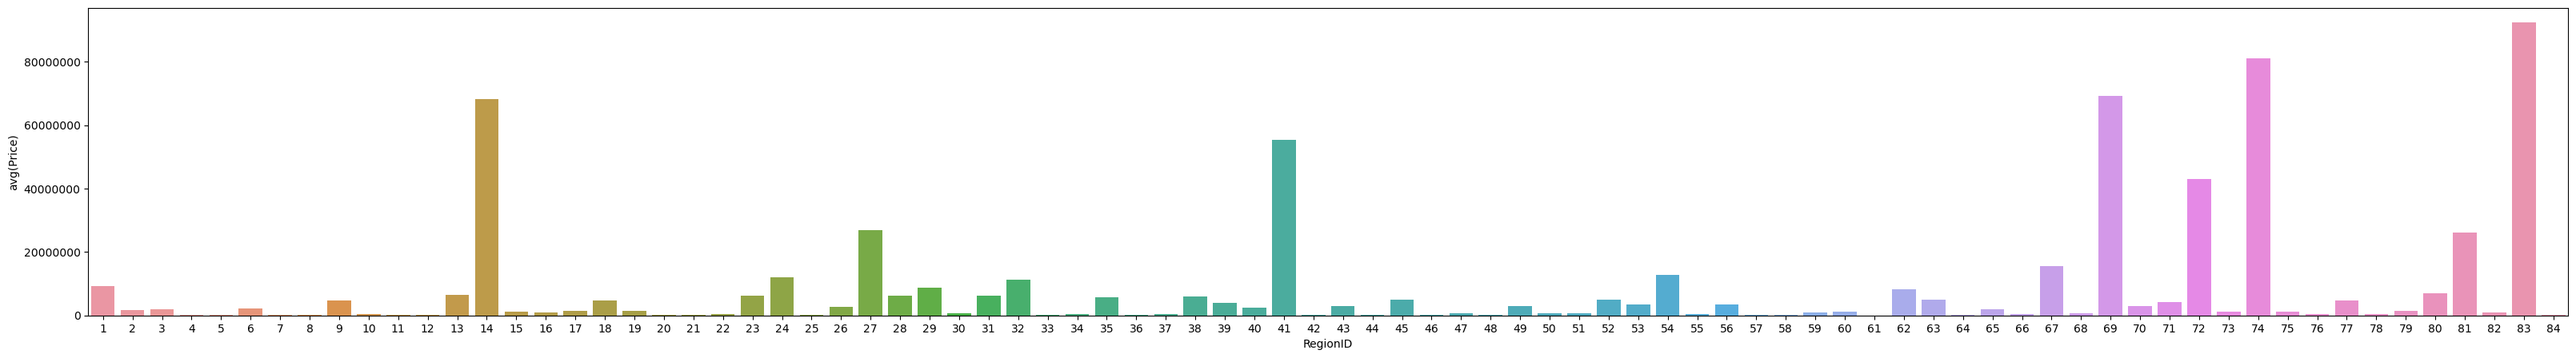

In [55]:
from matplotlib import pyplot

fig_dims = (40,5)
fig, ax = plt.subplots(figsize=fig_dims)
se.barplot(x = "RegionID", y = "avg(Price)", ax=ax, data=ad_r)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


### AVG-Price VS Levels ( Region , City)

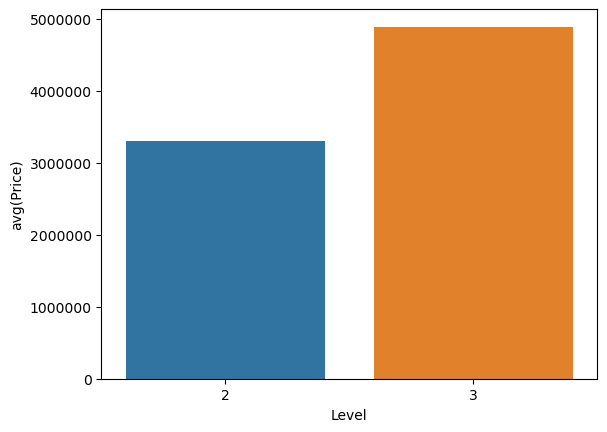

In [56]:
plots = se.barplot(x = "Level", y = "avg(Price)",
             data = ad_l)

plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Number of Searches per day

##### Changing Column type to Datetime

In [20]:
from pyspark.sql.functions import *

from pyspark.sql.functions import col

from pyspark.sql.types import StringType,DateType,IntegerType,FloatType,TimestampType

In [21]:
search_date = search_info.withColumn("SearchDate",search_info.SearchDate.cast(TimestampType()))


In [22]:
search_date.printSchema()

root
 |-- SearchID: integer (nullable = true)
 |-- SearchDate: timestamp (nullable = true)
 |-- IPID: integer (nullable = true)
 |-- UserID: integer (nullable = true)
 |-- IsUserLoggedOn: integer (nullable = true)
 |-- SearchQuery: string (nullable = true)
 |-- LocationID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- SearchParams: string (nullable = true)



### Extracting the Day of the Week.

In [23]:
search_date2 = search_date.withColumn("dayofweek", dayofweek("SearchDate"))
                            

In [24]:
search_date2.printSchema()

root
 |-- SearchID: integer (nullable = true)
 |-- SearchDate: timestamp (nullable = true)
 |-- IPID: integer (nullable = true)
 |-- UserID: integer (nullable = true)
 |-- IsUserLoggedOn: integer (nullable = true)
 |-- SearchQuery: string (nullable = true)
 |-- LocationID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- SearchParams: string (nullable = true)
 |-- dayofweek: integer (nullable = true)



In [32]:
search_data1 = search_date2.groupBy('dayofweek').count()

#### Converting into Pandas for Visualisation

In [35]:
search_pandas = search_data.toPandas()

/home/hadoop/miniconda/lib/python3.7/site-packages/pyarrow/util.py:43: FutureWarning: pyarrow.open_stream is deprecated as of 0.17.0, please use pyarrow.ipc.open_stream instead.
  warnings.warn(msg, FutureWarning)


In [39]:
search_pandas

,dayofweek,count
0,1,16142357
1,6,12716518
2,3,19146425
3,5,14528876
4,4,16969022
5,7,14156386
6,2,18499878


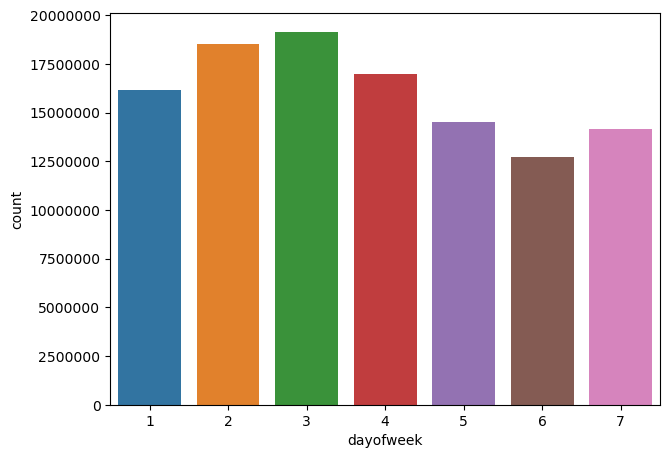

In [40]:
plots = se.barplot(x = "dayofweek", y = "count",
             data = search_pandas)

plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## IsClick Prediction for Contextual ads
### Dropping non contextual ads

In [67]:
df_context = search_click.dropna()

### Counting contextual ads

In [36]:
df_context.count()

190157735

### Describing data to perform operations

In [37]:
df_context.describe().show()

+-------+--------------------+--------------------+------------------+----------+--------------------+--------------------+
|summary|            SearchID|                AdID|          Position|ObjectType|             HistCTR|             IsClick|
+-------+--------------------+--------------------+------------------+----------+--------------------+--------------------+
|  count|           190157735|           190157735|         190157735| 190157735|           190157735|           190157735|
|   mean|  5.69854853531422E7|1.8845459732623287E7|3.5966107873550346|       3.0|0.010295077817999277|0.006028095570238045|
| stddev|3.2898612568632223E7|1.0426836110354574E7| 2.972755824078895|       0.0| 0.01556112081069576| 0.07740644459955175|
|    min|                   2|                 473|                 1|         3|              1.0E-5|                   0|
|    max|           113964820|            36891660|                 7|         3|                 1.0|                   1|
+-------

### Joining Tables

#### Below Steps are to join and select features as required for further classifications

In [68]:
df_join = df_context.join(ad_info, on=['AdID'], how='inner')

In [39]:
df_join.show(1)

+------+--------+--------+----------+-------+-------+----------+----------+--------------------+-----+-----+---------+
|  AdID|SearchID|Position|ObjectType|HistCTR|IsClick|LocationID|CategoryID|              Params|Price|Title|IsContext|
+------+--------+--------+----------+-------+-------+----------+----------+--------------------+-----+-----+---------+
|404966|23088251|       1|         3| 1.0E-5|      0|      null|        60|{178:'Для девочек...|458.0|2топа|        1|
+------+--------+--------+----------+-------+-------+----------+----------+--------------------+-----+-----+---------+
only showing top 1 row



In [69]:
df_join_final = df_join.join(category,on=['CategoryID'],how = 'inner')

In [70]:
df_join_final1 = df_join_final.join(search_info,on=['SearchID'],how = 'inner')

In [148]:
df_join_final1.show(1)

+--------+----------+--------+--------+----------+-------+-------+----------+--------------------+------+------+---------+-----+----------------+-------------+-------------------+-------+-------+--------------+-----------+----------+----------+--------------------+
|SearchID|CategoryID|    AdID|Position|ObjectType|HistCTR|IsClick|LocationID|              Params| Price| Title|IsContext|Level|ParentCategoryID|SubcategoryID|         SearchDate|   IPID| UserID|IsUserLoggedOn|SearchQuery|LocationID|CategoryID|        SearchParams|
+--------+----------+--------+--------+----------+-------+-------+----------+--------------------+------+------+---------+-----+----------------+-------------+-------------------+-------+-------+--------------+-----------+----------+----------+--------------------+
|     148|        60|27819278|       7|         3| 1.0E-5|      0|      null|{110:'Верхняя оде...|2639.0|Куртка|        1|    3|               3|           43|2015-05-12 17:06:14|2219909|3852793|       

In [71]:
df_isClick = df_join_final1.join(user_info,on = ['UserID'],how = 'inner')

In [56]:
df_isClick.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- SearchID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- AdID: integer (nullable = true)
 |-- Position: integer (nullable = true)
 |-- ObjectType: integer (nullable = true)
 |-- HistCTR: double (nullable = true)
 |-- IsClick: integer (nullable = true)
 |-- LocationID: integer (nullable = true)
 |-- Params: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Title: string (nullable = true)
 |-- IsContext: integer (nullable = true)
 |-- Level: integer (nullable = true)
 |-- ParentCategoryID: integer (nullable = true)
 |-- SubcategoryID: integer (nullable = true)
 |-- SearchDate: timestamp (nullable = true)
 |-- IPID: integer (nullable = true)
 |-- IsUserLoggedOn: integer (nullable = true)
 |-- SearchQuery: string (nullable = true)
 |-- LocationID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- SearchParams: string (nullable = true)
 |-- UserAgentID: integer (nullable = tr

In [57]:
df_isClick.columns

['UserID',
 'SearchID',
 'CategoryID',
 'AdID',
 'Position',
 'ObjectType',
 'HistCTR',
 'IsClick',
 'LocationID',
 'Params',
 'Price',
 'Title',
 'IsContext',
 'Level',
 'ParentCategoryID',
 'SubcategoryID',
 'SearchDate',
 'IPID',
 'IsUserLoggedOn',
 'SearchQuery',
 'LocationID',
 'CategoryID',
 'SearchParams',
 'UserAgentID',
 'UserAgentOSID',
 'UserDeviceID',
 'UserAgentFamilyID']

In [73]:
df_isClick1 = df_isClick.select(['Position',
 'ObjectType',
 'Price',
 'IsContext',
 'Level',
 'ParentCategoryID',
 'SubcategoryID',
 'IsUserLoggedOn',
 'UserAgentID',
 'UserAgentOSID',
 'UserDeviceID',
 'UserAgentFamilyID',
 'IsClick',])

In [88]:
df_isClick1.printSchema()

root
 |-- Position: integer (nullable = true)
 |-- ObjectType: integer (nullable = true)
 |-- Price: double (nullable = true)
 |-- IsContext: integer (nullable = true)
 |-- Level: integer (nullable = true)
 |-- ParentCategoryID: integer (nullable = true)
 |-- SubcategoryID: integer (nullable = true)
 |-- IsUserLoggedOn: integer (nullable = true)
 |-- UserAgentID: integer (nullable = true)
 |-- UserAgentOSID: integer (nullable = true)
 |-- UserDeviceID: integer (nullable = true)
 |-- UserAgentFamilyID: integer (nullable = true)
 |-- IsClick: integer (nullable = true)



In [74]:
from pyspark.sql.types import IntegerType
df_isClick1 = df_isClick1.withColumn("Price",df_isClick1.Price.cast(IntegerType()))

In [75]:
df_isClick1.printSchema()

root
 |-- Position: integer (nullable = true)
 |-- ObjectType: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- IsContext: integer (nullable = true)
 |-- Level: integer (nullable = true)
 |-- ParentCategoryID: integer (nullable = true)
 |-- SubcategoryID: integer (nullable = true)
 |-- IsUserLoggedOn: integer (nullable = true)
 |-- UserAgentID: integer (nullable = true)
 |-- UserAgentOSID: integer (nullable = true)
 |-- UserDeviceID: integer (nullable = true)
 |-- UserAgentFamilyID: integer (nullable = true)
 |-- IsClick: integer (nullable = true)



### Importing required Models and Evaluators

In [76]:
from pyspark.ml.feature import(VectorAssembler,VectorIndexer,
                              OneHotEncoder,StringIndexer)

from pyspark.ml.classification import LogisticRegression,RandomForestClassifier,NaiveBayes

from pyspark.ml import Pipeline

from pyspark.sql import functions as f

In [89]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator

#### Dropping any null values

In [77]:
df_isClick1 = df_isClick1.na.drop()

### Intializing a Vector Assembler

In [98]:
assembler = VectorAssembler(inputCols = ['Position',
 'ObjectType',
 'Price',
 'IsContext',
 'Level',
 'ParentCategoryID',
 'SubcategoryID',
 'IsUserLoggedOn',
 'UserDeviceID',
 'UserAgentFamilyID'] ,outputCol = 'features')

### Vectorizing the Features

In [99]:
df_isClick1_features = assembler.transform(df_isClick1)

In [102]:
df_isClick1_features.cache()
df_isClick1_features.show()

+--------+----------+-----+---------+-----+----------------+-------------+--------------+-----------+-------------+------------+-----------------+-------+--------------------+
|Position|ObjectType|Price|IsContext|Level|ParentCategoryID|SubcategoryID|IsUserLoggedOn|UserAgentID|UserAgentOSID|UserDeviceID|UserAgentFamilyID|IsClick|            features|
+--------+----------+-----+---------+-----+----------------+-------------+--------------+-----------+-------------+------------+-----------------+-------+--------------------+
|       7|         3|  750|        1|    3|              12|           42|             0|       2764|           20|        2014|               62|      0|[7.0,3.0,750.0,1....|
|       1|         3|17700|        1|    3|              12|           42|             0|       2764|           20|        2014|               62|      0|[1.0,3.0,17700.0,...|
|       1|         3|37990|        1|    3|              12|           42|             0|       2764|           20|     

## Logistic Regression

In [78]:
log_reg_click = LogisticRegression(featuresCol='features',labelCol='IsClick')

#### Fitting and Testing

In [103]:
train_data,test_data = df_isClick1_features.randomSplit([0.8,0.2])

In [87]:
fit = log_reg_click.fit(train_data)

In [88]:
results = fit.transform(test_data)

### Evaluating the Model

In [90]:
my_evaluator = BinaryClassificationEvaluator(rawPredictionCol = 'prediction',labelCol = 'IsClick')

In [91]:
AUC = my_evaluator.evaluate(results)

In [92]:
AUC

0.5

## Random Forest Classifier

In [104]:
rf = RandomForestClassifier(labelCol="IsClick", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)

#### Fitting and Testing 

In [105]:
rfModel = rf.fit(train_data)

In [106]:
predictions = rfModel.transform(test_data)

### Evaluating the model

In [115]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol = 'IsClick')

rd_metrics = evaluator.evaluate(predictions)

In [116]:
rd_metrics

0.9909451671709945

## Plotting the Metrics

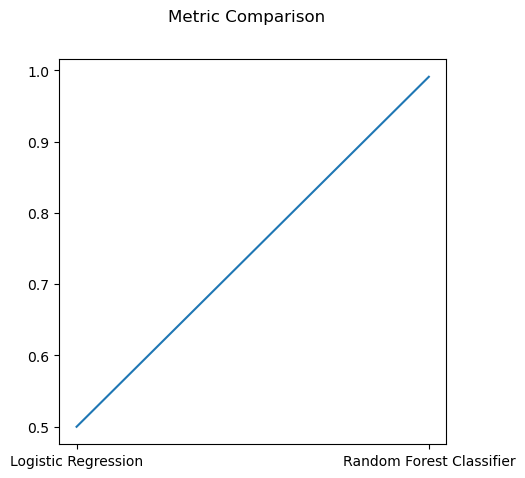

In [130]:
names = ['Logistic Regression', 'Random Forest Classifier']
values = [AUC,rd_metrics]

plt.figure(figsize=(5, 5))

se.lineplot(x = names, y = values,hue="region", style="event")
plt.suptitle('Metric Comparison')
plt.show()

### Clearly, We see that random Forest Classifier is the better model

#### Stopping the spark session

In [ ]:
spark.stop()